<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/02_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With TensorFlow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


### Create Data

* This data will be used to train the neural network

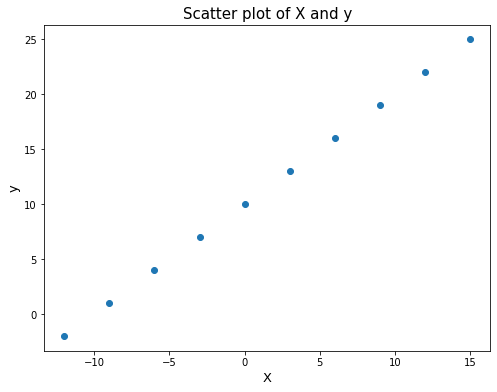

In [2]:
X = np.array([[-12, -9, -6, -3, 0, 3, 6, 9, 12, 15]]) # Row Matrix
y = np.array([-2, 1, 4, 7, 10, 13, 16, 19, 22, 25])


# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter plot of X and y", size=15)
plt.show()

In [3]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [4]:
# Convert the NumPy arrays to Tensors
# Cast and reshape X
X = tf.cast(tf.constant(X), dtype=tf.float16)
X = tf.reshape(X, shape=(-1, 1))
y = tf.cast(tf.constant(y), dtype=tf.float16)

X.shape, y.shape

(TensorShape([10, 1]), TensorShape([10]))

### Steps In Modelling With TensorFlow

1. **Create a model**: define the `input`, `hidden` and `output` layers of the deep learning model.
2. **Compile the model**: define the `loss function` (i.e the function that tells our model how wrong it is), the `optimizer` (it tells our model how to improve the patterns its learning) and the `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fit the model**: the model `learns` the `patterns` between the input and the output

#### Create a baseline model


### Some Key Terms

* **Loss**: How wrong the model predictions are (you want to minimize this)
* **Optimizer**: It tells the model how it should update it's parameters to improve its predictions.
* **Metrics**: Human interpretable values for how well the model is performing.
* **Epocs**: This represents the number of times the model will go thru all the training examples.
* **Evaluation** (on unseen data): This tells us how reliable the our model predictions are on unseen data.

In [5]:
# Set seed for reproducibility
SEED = 123
tf.random.set_seed(SEED)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None) # The model has a single neuron

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # MAE: Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # OR 'sgd'
              metrics = ["mae"] # OR tf.keras.losses.mae
              )

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 327ms/step - loss: 10.8300 - mae: 10.8300
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 10.7975 - mae: 10.7975
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 10.7650 - mae: 10.7650
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 10.7325 - mae: 10.7325
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.7000 - mae: 10.7000


In [6]:
X, y

(<tf.Tensor: shape=(10, 1), dtype=float16, numpy=
 array([[-12.],
        [ -9.],
        [ -6.],
        [ -3.],
        [  0.],
        [  3.],
        [  6.],
        [  9.],
        [ 12.],
        [ 15.]], dtype=float16)>,
 <tf.Tensor: shape=(10,), dtype=float16, numpy=array([-2.,  1.,  4.,  7., 10., 13., 16., 19., 22., 25.], dtype=float16)>)

In [7]:
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 78ms/step


array([[9.439685]], dtype=float32)

In [8]:
# Since the mae is ~11 on average, let's add 11 to the predicted value
y_pred + 11

array([[20.439686]], dtype=float32)

### Improve The Model

> We can improve the model by altering the steps taken to create the model.

1. **Create model**: We might:
  * Add more layers
  * increase the number of hidden units(neurons)
  * change the activation function

2. **Compile model**: We might:
  * change the optimization function
  * change the learning rate

3. **Fit the model**: We might:
  * increase the number of epochs
  * increase the training data

In [9]:
# Rebuild the model by increasing the number of epochs
tf.random.set_seed(SEED)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (increase the epochs)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 743ms/step - loss: 9.5507 - mae: 9.5507
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 9.5182 - mae: 9.5182
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 9.4857 - mae: 9.4857
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 9.4532 - mae: 9.4532
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.4207 - mae: 9.4207
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 9.3882 - mae: 9.3882
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3557 - mae: 9.3557
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3232 - mae: 9.3232
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.2907 - mae: 9.2907
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 9.2582 - mae: 9.2582
Epoch 11/100
1/1 [==============================] - 0s 22ms/step - l

In [10]:
# Make predictions
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 94ms/step


array([[29.712105]], dtype=float32)

#### Tweak The Model

* Experiment by changing the `hyperparameters`.
* Add a new layer.

In [11]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation="ReLU"),
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])

# Fit model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 651ms/step - loss: 11.4500 - mae: 11.4500
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9662 - mae: 10.9662
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4763 - mae: 10.4763
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9769 - mae: 9.9769
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4924 - mae: 9.4924
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9848 - mae: 8.9848
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 8.4821 - mae: 8.4821
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.9344 - mae: 7.9344
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 7.3586 - mae: 7.3586
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7649 - mae: 6.7649
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - lo

In [12]:
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 130ms/step


array([[32.09102]], dtype=float32)

### Try Using A Different Optimizer

* e.g. Adam

In [13]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation=None),
    tf.keras.layers.Dense(units=1),
])
# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 892ms/step - loss: 12.0504 - mae: 12.0504
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 11.2842 - mae: 11.2842
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8334 - mae: 10.8334
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 10.4909 - mae: 10.4909
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1554 - mae: 10.1554
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.8209 - mae: 9.8209
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4839 - mae: 9.4839
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1418 - mae: 9.1418
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7926 - mae: 8.7926
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4345 - mae: 8.4345
Epoch 11/100
1/1 [==============================] - 0s 9ms/st

In [14]:
# Make predictions
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 164ms/step


array([[28.59477]], dtype=float32)

### Evaluate The Model Performance

* It's a good idea to `visualize`.
* We can visualize the following:

  1. Data.
  2. Model.
  3. Model training.
  4. The model predictions.

In [15]:
# Create a bigger data
X = tf.cast(tf.range(-100, 100, 4), dtype=tf.float16)
y = X + 10


# Turn it into a matrix
X = tf.expand_dims(X, axis=-1)


tf.size(X).numpy()

50

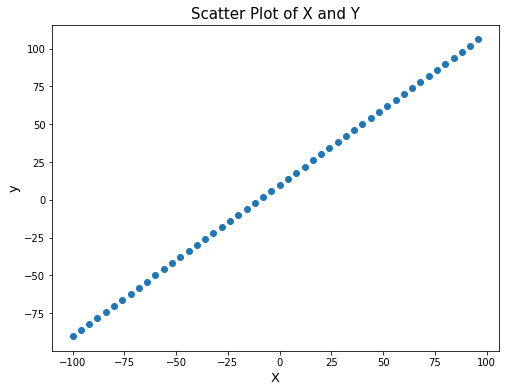

In [16]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)

plt.show()

In [17]:
0.8 * X.shape[0]

40.0

In [18]:
# Split the data
X_train, X_val = X[:40], X[40:]
y_train, y_val = y[:40], y[40:]

X_train.shape, X_val.shape

(TensorShape([40, 1]), TensorShape([10, 1]))

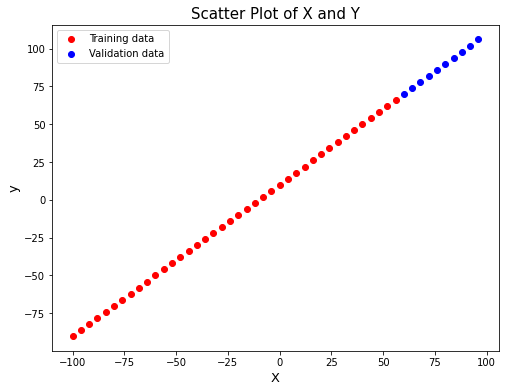

In [19]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X_train, y_train, color="red", label="Training data")
plt.scatter(X_val, y_val, color="blue", label="Validation data")
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)
plt.legend()

plt.show()

### Visualize The Data Split

In [20]:
# from sklearn.model_selection import train_test_split



# RANDOM_STATE, TEST_SIZE = 123, 0.2

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
# X_train.shape, X_val.shape

In [21]:
# Build model (with input shape)
tf.random.set_seed(SEED)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation=None, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer"),
], name="neural_net_1")

# Compile 
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])



In [22]:
# Model Summary
model_2.summary()

Model: "neural_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Some Key Terms
* **Total params**: total number of parameters the model needs to learn.
* **Trainable params**: these are the parameters (patterns) that the model can update as it trains.
* **Non-trainable params**: these parameters are not updated during training. this is typical when you use already learned parameters from other models during training (i.e transfer learning)

In [23]:
# Fit 
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 45.8414 - mae: 45.8414
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 28.5929 - mae: 28.5929
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 32.4410 - mae: 32.4410
Epoch 4/100
2/2 [==============================] - 0s 19ms/step - loss: 21.8502 - mae: 21.8502
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 22.0995 - mae: 22.0995
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 15.7541 - mae: 15.7541
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 21.5709 - mae: 21.5709
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 19.1525 - mae: 19.1525
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 13.3652 - mae: 13.3652
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 17.7376 - mae: 17.7376
Epoch 11/100
2/2 [==============================] - 0s 

### Visualize The Model

[![image.png](https://i.postimg.cc/XJnBMPTk/image.png)](https://postimg.cc/Lq08Lx4J)

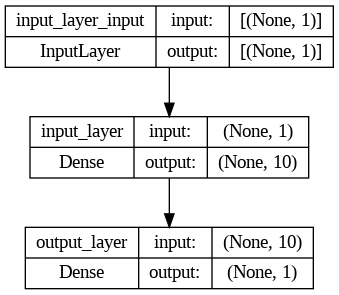

In [24]:
from tensorflow.keras.utils import plot_model


plot_model(model_2, show_shapes=True)

In [25]:
def plot_prediction(X_train=X_train, 
                    X_val=X_val, 
                    y_train=y_train, 
                    y_val=y_val, 
                    y_predictions=y_pred) -> "Plot":
  """This is used to visualize the model predictions.

  Params:
    X_train (tf.tensor): The training data.
    X_val (tf.tensor): The validation data.
    y_train (tf.tensor): The labels of the training data.
    y_train (tf.tensor): The labels of the validation data.
    y_pred (tf.tensor): The predicted data.

  Returns:
    None
  """
  # Visualize the data
  plt.figure(figsize=(8, 6))

  plt.scatter(X_train, y_train, color="red", label="Training data")
  plt.scatter(X_val, y_val, color="blue", label="Validation data")
  plt.scatter(X_val, y_predictions, color="green", label="Predicted data")
  plt.xlabel("X", size=13)
  plt.ylabel("y", size=13)
  plt.title("Scatter Plot of X and Y", size=15)
  plt.legend()

  plt.show()

In [26]:
# Make predictions
y_pred_2 = model_2.predict(X_val)

1/1 [==============================] - 0s 211ms/step


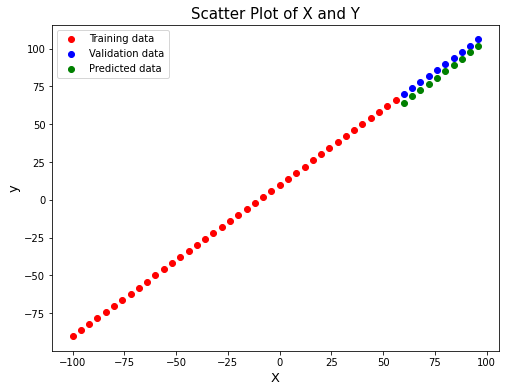

In [27]:
plot_prediction(y_predictions=y_pred_2)

In [28]:
# Evaluate
model_2.evaluate(X_val, y_val)

1/1 [==============================] - 0s 447ms/step - loss: 5.1236 - mae: 5.1236


[5.123565673828125, 5.123565673828125]

### Challenge

> Implement the following:

1. Mean Absolute Error

```python
tf.keras.losses.MAE()

# OR
tf.metrics.mean_absolute_error()
```

$$
mae = \frac{\sum^n_{i=1}{|y_{i}} - \hat{y}_{i}|}{n}
$$

2. Mean Squared Error

```python
tf.keras.losses.MSE()

# OR
tf.metrics.mean_squared_error()
```

$$
mse = \frac{\sum^n_{i=1}{(y_{i}} - \hat{y}_{i})^2}{n}
$$

In [29]:
def mean_absolute_error(*, y_true:"tf.tensor", y_pred:"tf.tensor") -> float:
  """This returns the Mean Absolute Error."""
  mae = tf.math.reduce_mean(tf.math.abs(y_true - tf.squeeze(tf.cast(y_pred, dtype=tf.float16))))
  return mae


def mean_squared_error(*, y_true:"tf.tensor", y_pred:"tf.tensor") -> float:
  """This returns the Mean Squared Error."""
  mse = tf.math.reduce_mean(tf.math.square(y_true - tf.squeeze(tf.cast(y_pred, dtype=tf.float16))))
  return mse



In [30]:
mae_2 = mean_absolute_error(y_true=y_val, y_pred=y_pred_2)
print(mae_2)

mse_2 = mean_squared_error(y_true=y_val, y_pred=y_pred_2)

mse_2

tf.Tensor(5.125, shape=(), dtype=float16)


<tf.Tensor: shape=(), dtype=float16, numpy=26.5>

In [31]:
# OR
tf.keras.losses.MAE(y_true=y_val, y_pred=tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=5.123567>

In [32]:
# Mean Squared Error
tf.keras.losses.MSE(y_true=y_val, y_pred=tf.squeeze(y_pred_2))

<tf.Tensor: shape=(), dtype=float32, numpy=26.47128>

#### Build The 3rd Model

* 2 layers 
* 500 epochs

In [33]:
tf.random.set_seed(SEED)

# Build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[1], activation=None),
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 11ms/step - loss: 23.6276 - mse: 820.4025
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 19.7690 - mse: 570.9535
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4470 - mse: 1122.7527
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 23.8571 - mse: 835.1614
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 11.2322 - mse: 141.4971
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 13.3310 - mse: 232.0448
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 17.9697 - mse: 488.9519
Epoch 8/500
2/2 [==============================] - 0s 22ms/step - loss: 8.7487 - mse: 119.0387
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 11.6119 - mse: 186.0183
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 15.5524 - mse: 350.7057
Epoch 11/500
2/2 [==========================

In [34]:
# Evaluate model performance
model_3.evaluate(X_val, y_val)

1/1 [==============================] - 0s 161ms/step - loss: 45.9542 - mse: 2163.1768


[45.954200744628906, 2163.1767578125]

In [35]:
# Make predictions
y_pred_3 = model_3.predict(X_val)

1/1 [==============================] - 0s 59ms/step


In [36]:
mae_3 = mean_absolute_error(y_true=y_val, y_pred=y_pred_3)
print(mae_3)

mse_3 = mean_squared_error(y_true=y_val, y_pred=y_pred_3)
mse_3

tf.Tensor(46.0, shape=(), dtype=float16)


<tf.Tensor: shape=(), dtype=float16, numpy=2166.0>

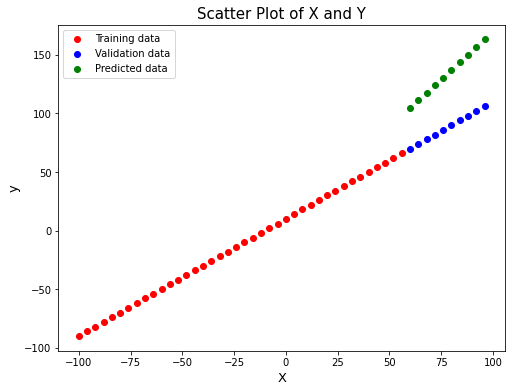

In [37]:
# Visualize the predictions
plot_prediction(y_predictions=y_pred_3)

### Saving TensorFlow Models

1. Using the dafault format: `model.save('my_model')`

2. Using HDF5 format: `model.save('my_model.h5)`

In [38]:
# Save model
model_2.save("model_2")

### Load Model

* `tf.keras.models.load_model('my_model')`

In [39]:
# Load the model
loaded_model_2 = tf.keras.models.load_model("model_2")

In [40]:
# Verify that the models are the same!
load_model_pred_2 = loaded_model_2.predict(X_val)

y_pred_2 == load_model_pred_2

1/1 [==============================] - 0s 63ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])